# <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">🧪 DRUG CLASSIFICATION</div>

<center><img src="https://images.unsplash.com/photo-1607619056574-7b8d3ee536b2?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1240&q=80" alt="Drug Picture" width="700" height="700"></center><br>

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">🧪 ABOUT THE DATASET</div>

👉 The drug classification dataset contains collected data from a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of five medications, Drug A, Drug B, Drug c, Drug x and y.

👉 For every patient we store their age, sex, blood pressure (BP), cholesterol level, sodium to potassium ratio and the type of drug they responded to which is also our target.

👉 Our job is to build a model to find out which drug might be appropriate for a future patient with the same illness. 


## <div style="text-align: center; font-family:newtimeroman; color: black;"> Notebook objectives 🔎</div>

<div style="text-align: center"> The Notebook is divided into two parts, each with its own purpose: </div> <br>
<div style="text-align: center">  📌 Dataset exploration using various types of data visualization. <br> <br>
  📌 Building various ML models that can predict drug type.</div>


## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">🧪 DATASET EXPLORATION</div>

## <div style="font-family:newtimeroman; color: black;"> Importing Necessary Libraries 📚</div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## <div style="font-family:newtimeroman; color: black;"> Importing the dataset, reading it and displaying its first five rows.</div>

In [2]:
df = pd.read_csv("drug200.csv")
df.head() #Gi prikazuva prvite 5 redovi od datasetot.

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## <div style="font-family:newtimeroman; color: black;">🧾 Generating descriptive statistics that summarize dataset's distribution.</div>

In [3]:
df.describe() #describe() funkcijata presmetuva rezime od statistiki koi se odnesuvaat na kolonite od dataframe-ot. 

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## <div style="font-family:newtimeroman; color: black;"> Checking how many values for each feature are missing. </div>

In [4]:
df.isna().sum() #Prikazuva kolku vrednosti nedostasuvaat od sekoja kolona. Gledame deka nikade nemame missing values.

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## <div style="font-family:newtimeroman; color: black;">🧾 Displaying general information about the dataset. </div>

In [5]:
df.info() #Prikazuva informacii za dataframe-ot.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <div style="font-family:newtimeroman; color: black;"> Checking the variable type of every feature. </div>

In [6]:
df.dtypes #Prikazuva od koj tip se site promenlivi.

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

👉 We can conclude that only two features (Age and Na_to_K) are numerical.

## <div style="font-family:newtimeroman; color: black;">🔎 About the variables: </div>

In [7]:
df.Drug.value_counts() #Prikazuva kolku primeroci se javuvaat vo datasetot za sekoj drug posebno

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

👉 From results above, we can conclude that most of the patients have responded to DrugY.

In [8]:
print(df.Sex.value_counts()) #Prikazuva kolku primeroci se javuvaat vo datasetot za sekoj pol posebno

M    104
F     96
Name: Sex, dtype: int64


👉 The female to male ratio is balanced.

In [9]:
print(df.BP.value_counts()) #Prikazuva kolku primeroci se javuvaat vo datasetot za sekoe nivo (high, low, normal) na krven pritisok

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


👉 The distribution of blood pressure level is balanced.

In [10]:
df.Cholesterol.value_counts() #Prikazuva kolku primeroci se javuvaat vo datasetot za sekoe nivo (high, normal) na holesterol

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

👉 The distribution of cholesterol level is balanced.

## <div style="font-family:newtimeroman; color: black;"> Displaying the age of the oldest and youngest patient. </div>

In [11]:
print("Max Age:", df.Age.max()) #Prikazi koja e maksimalnata vozrast vo dataframe-ot.
print("Min Age:", df.Age.min()) #Prikazi koja e minimalnata vozrast vo dataframe-ot.

Max Age: 74
Min Age: 15


## <div style="font-family:newtimeroman; color: black;"> Visual age distribution. </div>

<Figure size 900x500 with 0 Axes>

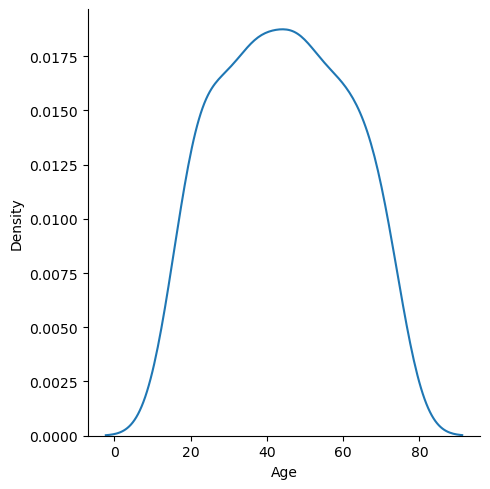

In [12]:
# Distribucija na vozrast/Age
plt.figure(figsize = (9,5))
sns.displot(df['Age'], kind="kde")
plt.show()

## <div style="font-family:newtimeroman; color: black;"> Visual distribution of the sodium to potassium ratio. </div>

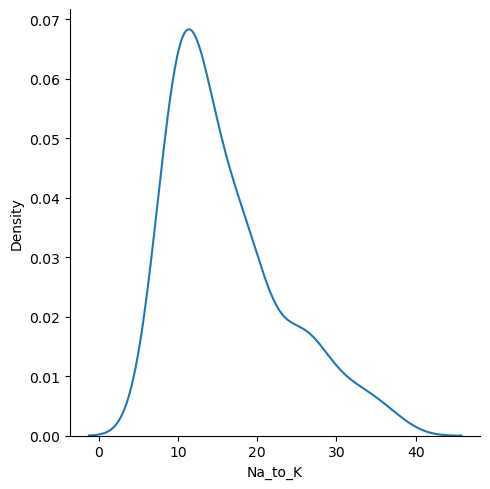

In [13]:
#Distribucija na nivoto na natrium sprema kalium vo krvta
sns.displot(df['Na_to_K'], kind="kde")

## <div style="font-family:newtimeroman; color: black;"> Age-Drug Analysis. </div>

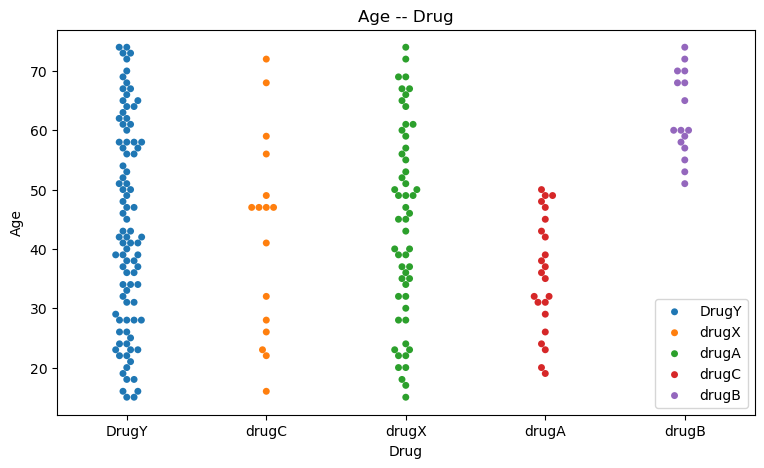

In [14]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df,  hue="Drug")
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

* Patients older than 51 years old, have reacted to DrugB. 
* Patients younger than 50 years old have reacted to DrugA. 

## <div style="font-family:newtimeroman; color: black;"> Sex-Drug Analysis. </div>

In [15]:
#Za sekoj drug kolku projavil reakcija kaj zenski i mashki soodvetno
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


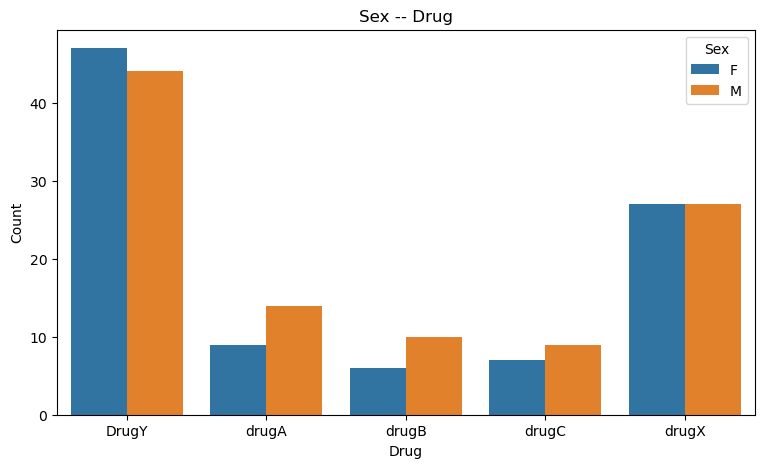

In [16]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

* Males have reacted to drugA, drugB and drugC more than females.
* Females have reacted to DrugY more than male people.
* drugX seems equal for males and females.
* According to this graph, Sex feature is not an important feature for classification.

## <div style="font-family:newtimeroman; color: black;"> BP-Drug Analysis. </div>

In [17]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


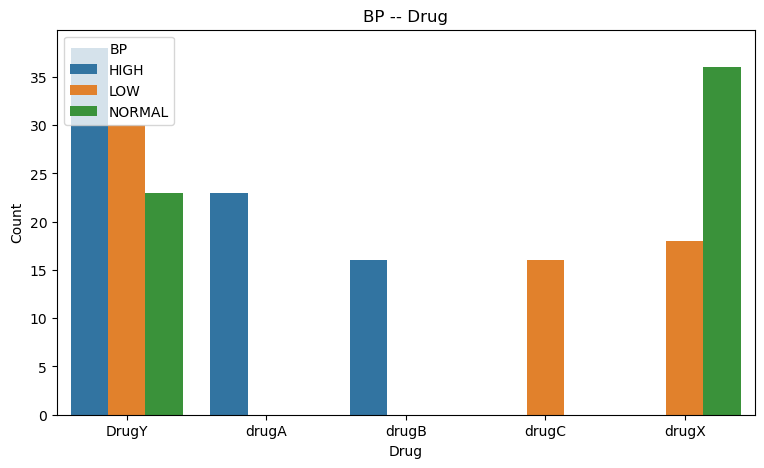

In [18]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

* drugA and drugB have shown reaction only by people who have HIGH blood pressure.
* drugC has shown reaction by people who have LOW blood pressure.
* drugX has shown reaction more by people who have NORMAL blood pressure.
* BP is an important feature for classification.

## <div style="font-family:newtimeroman; color: black;"> Na_to_K - Drug Analysis. </div>

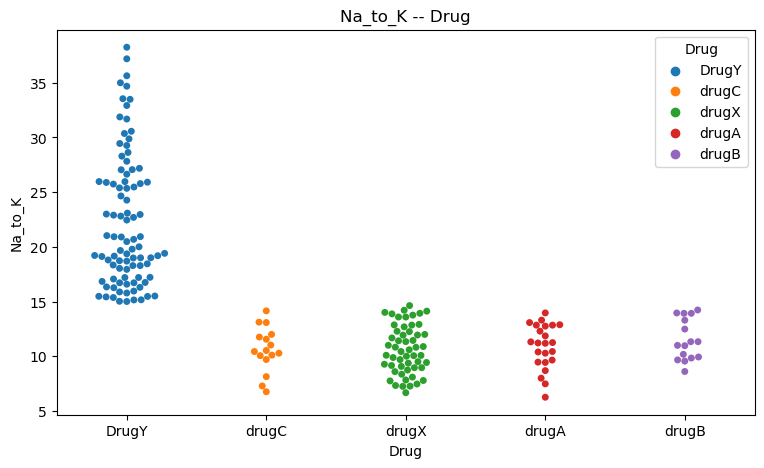

In [19]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df, hue="Drug")
plt.title("Na_to_K -- Drug")
plt.show()

In [20]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


**People who have Na_to_K ratio greater than 15, take DrugY.**

## <div style="font-family:newtimeroman; color: black;"> Cholesterol-Drug Analysis. </div>

In [21]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


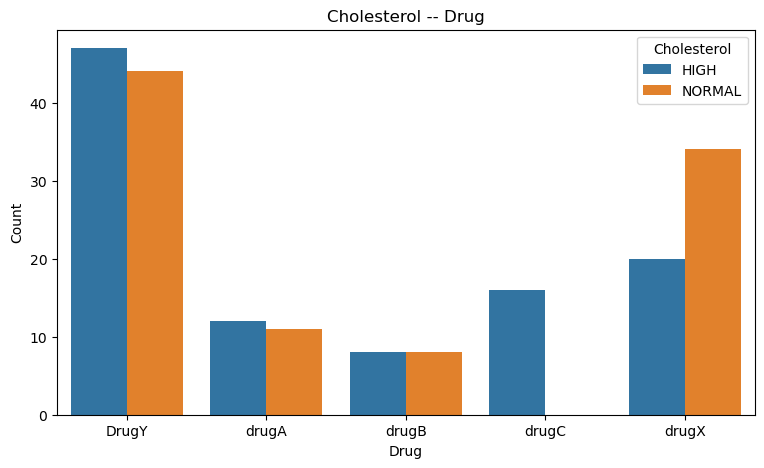

In [22]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

**DrugC has shown reaction by people who have HIGH cholesterol.**
* Cholesterol is an important feature to classify drugC

## <div style="font-family:newtimeroman; color: black;"> Na_to_K - BP -Drug Analysis. </div>

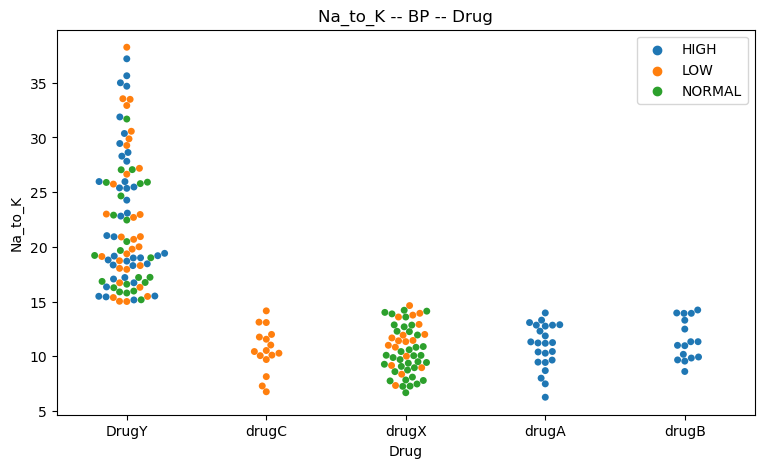

In [23]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

* If people have HIGH blood pressure and Na_to_K ratio is lower than 15 , they react to drugA and drugB only.
* If people have LOW blood pressure and Na_to_K ratio is lower than 15 , they react to drugC only.

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">🧪 BUILDING ML MODELS</div>

👉 First we will prepare the dataset before building the machine learning models.

## <div style="font-family:newtimeroman; color: black;"> Splitting the Dataset 🔨 </div>

In [24]:
#Gi importirame potrebnite biblioteki
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate,cross_val_score

The dataset will be split into **70% training and 30% testing**. 
The instances will be picked randomly (due to shuffle = True).

In [25]:
X = df.drop(["Drug"], axis=1) #Vo X promenlivata go smestuvame celiot dataset so isklucok na kolonata Drug. 
#Kolonata Drug mora da ja izostavime bidejki vo X ke cuvame samo input promenlivi. Drug e output promenliva.
#Vrz baza na input promenlivite treba da dobieme soodveten output (Drug type)
y = df["Drug"] #Vo y ke gi cuvame samo vrednostite od Drug kolonata.
#Odnosno vo y ke ja cuvame samo output promenlivata, koja istovremeno e i klasa.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)
#Gornata linija kod pravi split na datasetot na 70% training, 30% test.
#70% od instancite od datasetot ke ni bidat za treniranje, a ostanatite 30% za testiranje.
#Shuffle = True znaci deka random/slucajno ke gi odbira instancite za treniranje i za test, a ne sekvencijalno.

## <div style="font-family:newtimeroman; color: black;">  Using pandas.get_dummies() 🔨 </div>

pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

A dummy or indicator variable can have a value of 0 or 1.

In [26]:
#So ovaa funkcija konvertirame kategoricki(categorical) promenlivi vo dummy ili indikator promenlivi.
#Dummy ili indikator promenliva moze da ima vrednost 0 ili 1.
#Konvertiranjeto e vazno za da moze site promenlivi vo datasetot da se od numericki tip ovozmozuvajki polesno treniranje.
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_test.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
95,36,11.424,0,1,0,1,0,0,1
15,16,15.516,1,0,1,0,0,0,1
30,18,8.750,1,0,0,0,1,0,1
158,59,10.444,1,0,0,1,0,1,0
128,47,33.542,0,1,0,1,0,0,1


Now we will print the shapes of each of the dataframes acquired by the train_test_split function to check if they are compatible.

In [27]:
#Gi pecatime dimenziite na site cetiri datasets koi gi dobivme preku train_test_split funkcijata
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (140, 9)
x_test shape: (60, 9)
y_train shape: (140,)
y_test shape: (60,)


## <div style="font-family:newtimeroman; color: black;"> ML Models 🚀 </div>

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">Logistic Regression 🔨</div>

In [28]:
from sklearn.linear_model import LogisticRegression #biblioteka za implementiranje na logisticka regresija

LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000) #go definirame logistic regression klasifikator
LRclassifier.fit(X_train, y_train) #go trenirame modelot koristejki gi instancite za treniranje

y_pred = LRclassifier.predict(X_test) #Istreniraniot model go koristime da pravi predikcija(prediction) vrz novi/nevideni instanci.

print(classification_report(y_test, y_pred)) #so ovaa naredba gi pecatime site povazni parametri dobieni od treniranjeto i predikcijata
#Tie parametri se precision, recall, f1-score i support.

print(confusion_matrix(y_test, y_pred)) #Za confusion matrix:  
#Ako gledame od levo kon desno od matrix-ot (horizontalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX
#Ako gledame od gore kon dole od matrix-ot (vertikalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test) #Presmetuva tocnost na logistic regression klasifikatorot

print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))  #Ja pecati tocnosta

              precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        26
       drugA       1.00      0.71      0.83         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.83      0.91         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.93        60
   macro avg       0.89      0.90      0.87        60
weighted avg       0.96      0.93      0.94        60

[[25  0  1  0  0]
 [ 0  5  2  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  5  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 93.33%


**Let us recall what all the obtained parameters from the classification_report function mean.**

👉 **Precision:** Percentage of correct positive predictions relative to total positive predictions.

👉 **Recall:** Percentage of correct positive predictions relative to total actual positives.

👉 **F1 Score:** A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

👉 **Support:** These values simply tell us how many patients belonged to each class in the test dataset.

Additionally, we are given information about the accuracy, macro and weighted average.

👉 **Accuracy** is the percentage of data that are correctly classified, which ranges from 0 to 1.

👉 **Macro average** represents the arithmetic mean between all of the f1_scores, such that each score has the same importance.

👉 **Micro(weighted) average** takes into account how many samples there are per category (the greater the support, the more important that category's f1_score).


**🚀 Logistic Regression accuracy: 93.33% 🚀**

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">K Neighbours 🔨</div>

In [29]:
from sklearn.neighbors import KNeighborsClassifier #biblioteka za implementiranje na k neighbours
KNclassifier = KNeighborsClassifier(n_neighbors=20) #go definirame k neighbours klasifikator
KNclassifier.fit(X_train, y_train) #go trenirame modelot koristejki gi instancite za treniranje

y_pred = KNclassifier.predict(X_test) #Istreniraniot model go koristime da pravi predikcija(prediction) vrz novi/nevideni instanci.

print(classification_report(y_test, y_pred)) #so ovaa naredba gi pecatime site povazni parametri dobieni od treniranjeto i predikcijata
#Tie parametri se precision, recall, f1-score i support.

print(confusion_matrix(y_test, y_pred)) #Za confusion matrix:  
#Ako gledame od levo kon desno od matrix-ot (horizontalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX
#Ako gledame od gore kon dole od matrix-ot (vertikalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)  #Presmetuva tocnost
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100)) #Ja pecati tocnosta

              precision    recall  f1-score   support

       DrugY       0.90      1.00      0.95        26
       drugA       0.33      0.14      0.20         7
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.54      0.78      0.64        18

    accuracy                           0.68        60
   macro avg       0.35      0.38      0.36        60
weighted avg       0.59      0.68      0.62        60

[[26  0  0  0  0]
 [ 1  1  0  0  5]
 [ 0  0  0  0  3]
 [ 1  1  0  0  4]
 [ 1  1  2  0 14]]
K Neighbours accuracy is: 68.33%


C:\Users\Linux\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linux\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linux\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**🚀 K Neighbours accuracy: 68.33% 🚀**

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">Random Forest 🔨</div>

In [30]:
from sklearn.ensemble import RandomForestClassifier #biblioteka za implementiranje na random forest
rfc = RandomForestClassifier(random_state = 42) #go definirame random forest klasifikator
rfc.fit(X_train,y_train) #go trenirame modelot koristejki gi instancite za treniranje
y_pred = rfc.predict(X_test) #Istreniraniot model go koristime da pravi predikcija(prediction) vrz novi/nevideni instanci.
print(classification_report(y_test, y_pred)) #so ovaa naredba gi pecatime site povazni parametri dobieni od treniranjeto i predikcijata
#Tie parametri se precision, recall, f1-score i support.

print(confusion_matrix(y_test, y_pred)) #Za confusion matrix:  
#Ako gledame od levo kon desno od matrix-ot (horizontalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX
#Ako gledame od gore kon dole od matrix-ot (vertikalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX

from sklearn.metrics import accuracy_score
rfAcc = accuracy_score(y_pred,y_test)  #Presmetuva tocnost
print('Random Forest accuracy is: {:.2f}%'.format(rfAcc*100)) #Ja pecati tocnosta

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 100.00%


**🚀 Random Forest accuracy: 100.00% 🚀**

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">Decision Tree 🔨</div>

In [31]:
from sklearn.tree import DecisionTreeClassifier #biblioteka za implementiranje na decision tree
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10) #go definirame decision tree klasifikator
DTclassifier.fit(X_train, y_train) #go trenirame modelot koristejki gi instancite za treniranje

y_pred = DTclassifier.predict(X_test) #Istreniraniot model go koristime da pravi predikcija(prediction) vrz novi/nevideni instanci.

print(classification_report(y_test, y_pred)) #so ovaa naredba gi pecatime site povazni parametri dobieni od treniranjeto i predikcijata
#Tie parametri se precision, recall, f1-score i support.
print(confusion_matrix(y_test, y_pred)) #Za confusion matrix:  
#Ako gledame od levo kon desno od matrix-ot (horizontalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX
#Ako gledame od gore kon dole od matrix-ot (vertikalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX


from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)  #Presmetuva tocnost
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100)) #Ja pecati tocnosta

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
Decision Tree accuracy is: 100.00%


**🚀 Decision Tree accuracy: 100.00% 🚀**

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">Support Vector Machine (SVM) 🔨</div>

In [32]:
from sklearn.svm import SVC #biblioteka za implementiranje na SVM
SVCclassifier = SVC(kernel='linear', max_iter=251) #go definirame SVM klasifikator
SVCclassifier.fit(X_train, y_train)  #go trenirame modelot koristejki gi instancite za treniranje

y_pred = SVCclassifier.predict(X_test) #Istreniraniot model go koristime da pravi predikcija(prediction) vrz novi/nevideni instanci.

print(classification_report(y_test, y_pred)) #so ovaa naredba gi pecatime site povazni parametri dobieni od treniranjeto i predikcijata
#Tie parametri se precision, recall, f1-score i support.
print(confusion_matrix(y_test, y_pred)) #Za confusion matrix:  
#Ako gledame od levo kon desno od matrix-ot (horizontalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX
#Ako gledame od gore kon dole od matrix-ot (vertikalno) postaveni se vo ovoj redosled drugY,drugA,drugB,drugC,drugX

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test) #Presmetuva tocnost
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100)) #Ja pecati tocnosta

              precision    recall  f1-score   support

       DrugY       1.00      0.96      0.98        26
       drugA       1.00      1.00      1.00         7
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

[[25  0  1  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
SVC accuracy is: 98.33%


C:\Users\Linux\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**🚀 Support Vector Machine accuracy: 98.33% 🚀**

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">👀 MODEL COMPARISON</div>

In [33]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbours', 'Random Forest', 'Decision Tree', 'SVM'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, rfAcc*100, DTAcc*100, SVCAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,100.000000
3,Decision Tree,100.000000
4,SVM,98.333333
0,Logistic Regression,93.333333
1,K Neighbours,68.333333


👉 From the results, it can be seen that most of ML models can reach **more than 90%** in predicting classification of drug type.

## <div style="text-align: center; background-color: #012D7A; font-family:newtimeroman; color: white; padding: 20px; line-height: 1;border-radius:25px">CONCLUSION 📊</div>

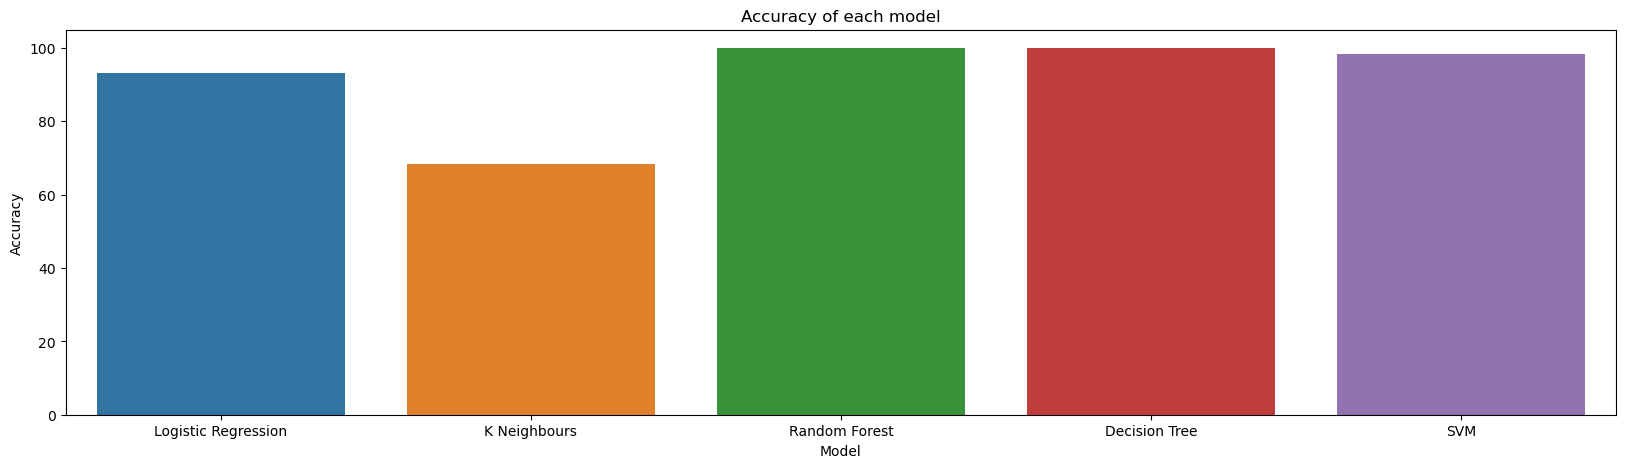

In [34]:
plt.figure(figsize = (20,5))
sns.barplot(x = "Model",y="Accuracy",data = compare)
plt.title("Accuracy of each model")
plt.show()


**Random Forest classifier  and Decision Tree classifier reach 100% accuracy.**

**The rest of the classifiers reach more than 90% accuracy, with the exception of K Neighbours which performs the worst with 68.33%.**